In [2]:
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt


In [ ]:
# CARICO PM100 (parquet) -> pandas E STAMPO INFO
# NB Usare job:bes_opt che serve una versione veccha per usare parquet

# import pandas as pd
# pm = pd.read_parquet("datasets/job_table.parquet")
# # Esplora colonne
# print(pm.columns)
# # Aggrega per intervallo temporale (es. resample a 1s/1min)
# pm['start'] = pd.to_datetime(pm['start_time'])
# pm['end'] = pd.to_datetime(pm['end_time'])
# pm.info()


# example = pm['node_power_consumption'].iloc[1]
# mem = pm['mem_power_consumption'].iloc[1]
# cpu = pm['cpu_power_consumption'].iloc[1]
# print(example)
# print(mem)
# print(cpu)
# len(example)
# duration = (pm['end'] - pm['start']).dt.total_seconds().iloc[1]

# print("samples:", len(example))
# print("duration (s):", duration)
# print("sample interval (s):", duration / len(example))


Index(['cores_alloc_layout', 'cores_allocated', 'cores_per_task', 'derived_ec',
       'eligible_time', 'end_time', 'group_id', 'job_id', 'job_state', 'nodes',
       'num_cores_req', 'num_cores_alloc', 'num_nodes_req', 'num_nodes_alloc',
       'num_tasks', 'partition', 'priority', 'qos', 'req_nodes', 'req_switch',
       'run_time', 'shared', 'start_time', 'state_reason', 'submit_time',
       'threads_per_core', 'time_limit', 'num_gpus_req', 'num_gpus_alloc',
       'mem_req', 'mem_alloc', 'user_id', 'node_power_consumption',
       'mem_power_consumption', 'cpu_power_consumption'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231238 entries, 0 to 231237
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   cores_alloc_layout      231238 non-null  object             
 1   cores_allocated         231238 non-null  object             
 2   cores

In [ ]:
# # DAL PM100 CREO L'ANDAMENTO DELLA POTENZA RICHEISTA DEL CLUSTER SCANDITA OGNI 20 SECONDI
# utilizzando le 3 poerr consumption - non credo abbia senso

# def resample_list(values, N):
#     """Resample a list to length N using linear interpolation.
#        If the list is empty, return zeros."""
#     if len(values) == 0:
#         return np.zeros(N)
#     if len(values) == 1:
#         # se solo 1 valore → replica
#         return np.ones(N) * float(values[0])

#     values = np.array(values, dtype=float)
#     x_old = np.linspace(0, 1, len(values))
#     x_new = np.linspace(0, 1, N)
#     return np.interp(x_new, x_old, values)


# pm = pd.read_parquet("datasets/job_table.parquet")
# pm['start'] = pd.to_datetime(pm['start_time'])
# pm['end']   = pd.to_datetime(pm['end_time'])

# step = pd.Timedelta(seconds=20)

# rows = []

# for _, row in pm.iterrows():

#     start = row['start']
#     end   = row['end']

#     L_node = len(row['node_power_consumption'])
#     L_mem  = len(row['mem_power_consumption'])
#     L_cpu  = len(row['cpu_power_consumption'])

#     N = max(L_node, L_mem, L_cpu, 1)   # almeno 1

#     node = resample_list(row['node_power_consumption'], N)
#     mem  = resample_list(row['mem_power_consumption'],  N)
#     cpu  = resample_list(row['cpu_power_consumption'],  N)

#     t = pd.date_range(start=start, end=end, periods=N)

#     p = node #+ mem + cpu

#     rows.append(pd.DataFrame({"time": t, "power": p}))

# df_all = pd.concat(rows)

# df_cluster = (
#     df_all
#     .set_index("time")
#     .resample(step)
#     .sum()
# )

# df_cluster.to_csv("cluster_power.csv")
# print(df_cluster.head())



                                 power
time                                  
2020-05-05 15:56:00+00:00  1402.000000
2020-05-05 15:56:20+00:00  1435.934025
2020-05-05 15:56:40+00:00  1496.307886
2020-05-05 15:57:00+00:00     0.000000
2020-05-05 15:57:20+00:00  1559.736098


In [ ]:
# # Stessa cosa di prima ma usando solo i job consumtpion  per node

# def resample_list(values, N):
#     """Resample a list to length N using linear interpolation.
#        If empty → zeros, if length=1 → replicate."""
#     values = list(values)
    
#     if len(values) == 0:
#         return np.zeros(N)
#     if len(values) == 1:
#         return np.ones(N) * float(values[0])

#     values = np.array(values, dtype=float)
#     x_old = np.linspace(0, 1, len(values))
#     x_new = np.linspace(0, 1, N)
#     return np.interp(x_new, x_old, values)

# # Caricamento dataset
# pm = pd.read_parquet("datasets/job_table.parquet")
# pm['start'] = pd.to_datetime(pm['start_time'])
# pm['end']   = pd.to_datetime(pm['end_time'])

# step = pd.Timedelta(seconds=20)

# rows = []

# for _, row in pm.iterrows():

#     start = row['start']
#     end   = row['end']

#     # Lunghezza della serie node_power_consumption
#     L_node = len(row['node_power_consumption'])

#     # N minimo = max(L_node, 1)
#     N = max(L_node, 1)

#     # 🔥 usa solo node_power_consumption
#     node = resample_list(row['node_power_consumption'], N)

#     # timeline
#     t = pd.date_range(start=start, end=end, periods=N)

#     # DataFrame del job
#     rows.append(pd.DataFrame({"time": t, "power": node}))

# # Unisci tutto
# df_all = pd.concat(rows)

# # Resample cluster
# df_cluster = (
#     df_all
#     .set_index("time")
#     .resample(step)
#     .sum()
# )

# df_cluster.to_csv("cluster_power_only_nodes.csv")

# print(df_cluster.head())


                            power
time                             
2020-05-05 15:56:00+00:00  1280.0
2020-05-05 15:56:20+00:00  1310.0
2020-05-05 15:56:40+00:00  1240.0
2020-05-05 15:57:00+00:00     0.0
2020-05-05 15:57:20+00:00  1280.0


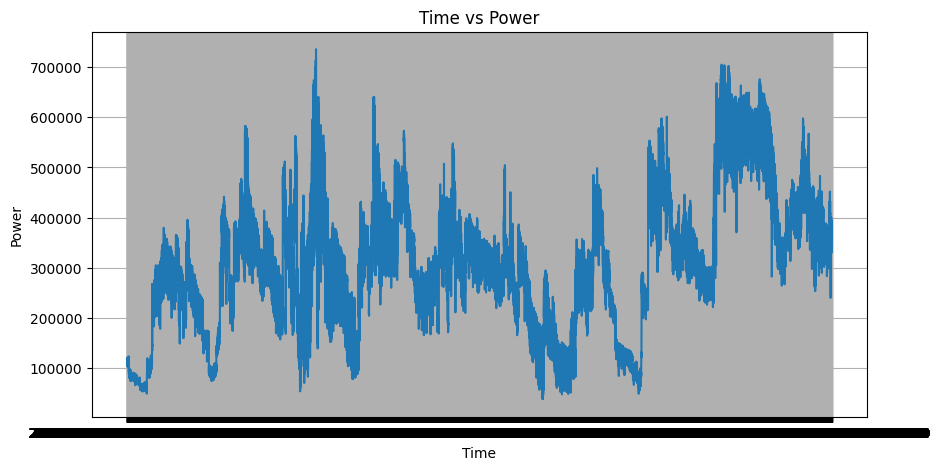

In [34]:
df = pd.read_csv("cluster_power_only_nodes.csv")
df_10days = df[87943:131052]
plt.figure(figsize=(10, 5))
plt.plot(df_10days["time"], df_10days["power"])
plt.xlabel("Time")
plt.ylabel("Power")
plt.title("Time vs Power")
plt.grid(True)
plt.show()
df_10days.to_csv("cluster_power_only_nodes_10days.csv", index=False)

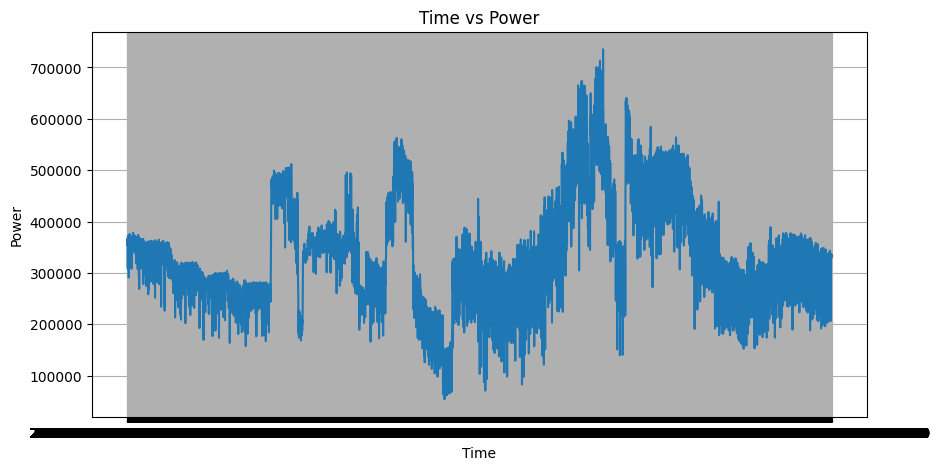

In [1]:
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
df = pd.read_csv("cluster_power_only_nodes_10days.csv")
df_first = df[8641:12960]
plt.figure(figsize=(10, 5))
plt.plot(df_first["time"], df_first["power"])
plt.xlabel("Time")
plt.ylabel("Power")
plt.title("Time vs Power")
plt.grid(True)
plt.show()

In [3]:
import pandas as pd


# IN QUESTA SIMULAZIONE, NON ABBIAMO UNA BATTERIA
# valutiamo dunque il costo complessivo senza avere una batteria e avendo una soglia max.
# SE SUPERIAMO LA SOGLIA DI RICHIESTA ALLA RETE ELETTRICA, PAGHIAMO TUTTO DI PIÙ (IL DOPPIO)
def dynamic_low_price(timestamp):
    hour = timestamp.hour
    if 0 <= hour < 6:
        return 0.0005
    elif 6 <= hour < 22:
        return 0.0012
    else:
        return 0.0007


def compute_cost(row):

    # se supero la soglia, il prezzo è x3

    energy = row["energy_Wh"]
    power = row["power"]
    dt = row["dt_hours"]
    E_peak = (power - THRESHOLD) * dt 
    E_base = THRESHOLD * dt

    COST_LOW = row["price_base"]
    COST_HIGH = COST_LOW * 3

    if row["power"] <= THRESHOLD:
        cost =  COST_LOW * energy
    else:
        cost =  E_peak * COST_HIGH + E_base * COST_LOW
    

    # print('energy =', energy , 'power =', power , " dt = ", dt, 'costo = ', cost)
    # print(energy , ';', power , ";", dt, ';', cost)
    # print(cost)

    return cost


# Parametri costi
THRESHOLD = 400000          # Watt

# Carica il CSV (usa header già presente)
df = pd.read_csv("cluster_power_only_nodes_10days.csv")#[8641:]
#  df = pd.read_csv("cluster_power_only_nodes.csv")

# Converti timestamp
df["time"] = pd.to_datetime(df["time"], utc=True)

# Calcola intervalli in ore
df["dt_hours"] = df["time"].diff().dt.total_seconds() / 3600
# df["dt_hours"].fillna(0, inplace=True)
df["dt_hours"] = df["dt_hours"].fillna(0)


# Calcola energia (Wh) per intervallo
df["energy_Wh"] = df["power"] * df["dt_hours"]

df["price_base"] = df["time"].apply(dynamic_low_price)

# pago la maggiorazione solo per l'energia extra soglia
df["cost"] = df.apply(compute_cost, axis=1)

# Risultato finale
total_cost = df["cost"].sum()
print(f"Costo totale: {total_cost:.2f} €,")


Costo totale: 91894.45 €,


Costo totale con batteria: 85568.92 €
Carica finale batteria: 183413.83 Wh


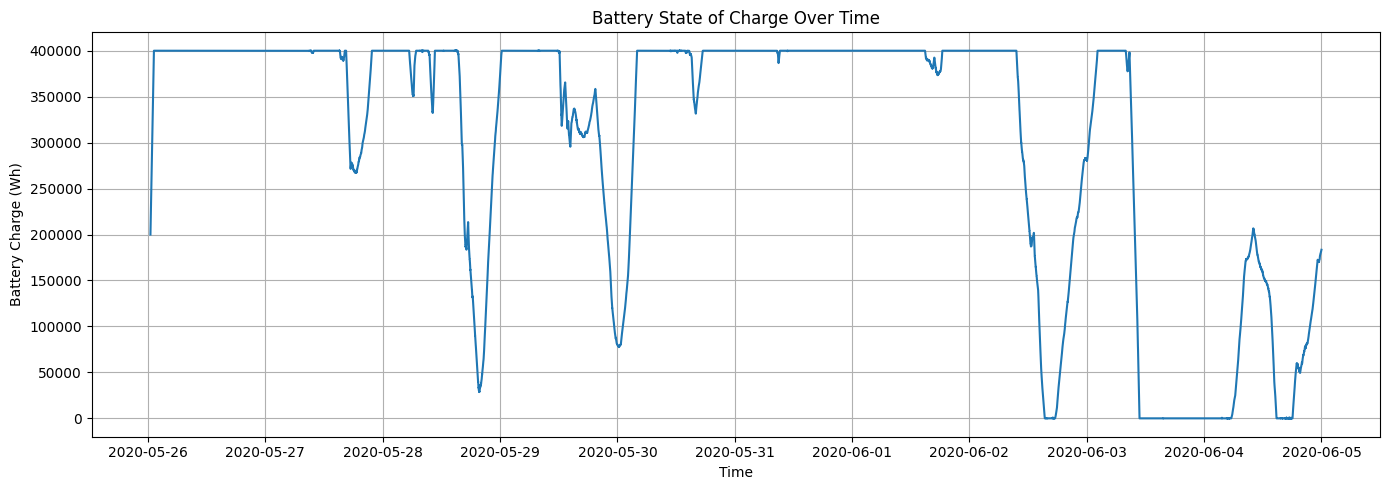

In [4]:
# In questa simulazione ho una batteria, che viene utilizzata quando si supera il threshold
# e viene ricaricata quando si è sotto threshold.
# non si considera la fascia oraria nella gestione della batteria, tariife come su

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def dynamic_low_price(timestamp):
    hour = timestamp.hour
    if 0 <= hour < 6:
        return 0.0005
    elif 6 <= hour < 22:
        return 0.0012
    else:
        return 0.0007


# ---------------------------
# PARAMETRI
# ---------------------------
THRESHOLD = 400000          # W

BATTERY_CAPACITY = 400000          # Wh
BATTERY_INITIAL_CHARGE = BATTERY_CAPACITY / 2    # Wh

# LIMITI DI CARICA/SCARICA REALE
MAX_CHARGE_RATE = 1600000            # Wh/h  (100 kW) # può scaricarsi a 1-C
MAX_DISCHARGE_RATE = 1600000         # Wh/h  (100 kW)

battery = BATTERY_INITIAL_CHARGE
total_cost = 0

battery_history = []
time_history = []

df = pd.read_csv("cluster_power_only_nodes_10days.csv")#[8641:]
# df = pd.read_csv("cluster_power_only_nodes.csv")

df["time"] = pd.to_datetime(df["time"], utc=True)
df["dt_hours"] = df["time"].diff().dt.total_seconds() / 3600
df["dt_hours"] = df["dt_hours"].fillna(0)


df["price_base"] = df["time"].apply(dynamic_low_price)

# df["energy_Wh"] = df["power"] * df["dt_hours"]

for idx, row in df.iterrows():

    COST_LOW = row["price_base"]
    COST_HIGH = COST_LOW * 3

    
    power = row["power"]
    dt = row["dt_hours"]
    t = row["time"]

    energy = power * dt
    E_peak = max(power - THRESHOLD, 0) * dt
    E_base = min(power, THRESHOLD) * dt

    # -----------------------------
    # CASO 1: sopra soglia → scarico la batteria
    # -----------------------------
    if power >= THRESHOLD:

        # limite fisico di scarica
        max_discharge_this_step = MAX_DISCHARGE_RATE * dt

        # energia massima scaricabile
        E_discharge = min(E_peak, battery, max_discharge_this_step)  # mettendo epeak, copro solamente il picco, tutto quello sotto lo pago con prezzo basso

        # aggiorna batteria
        battery -= E_discharge

        # picco non coperto
        E_peak_remaining = E_peak - E_discharge

        # costo:
        #   base sempre LOW
        #   picco rimanente HIGH
        cost = E_base * COST_LOW + E_peak_remaining * COST_HIGH
        total_cost += cost

    # -----------------------------
    # CASO 2: sotto soglia → ricarico la batteria
    # -----------------------------
    else:

        # quanto posso caricare
        max_charge_this_step = MAX_CHARGE_RATE * dt

        charging_room = BATTERY_CAPACITY - battery

        E_charge_available = (THRESHOLD - power) * dt     # serve per non arrivare a pagare per caricare la batteria al prezzo più high. 

        # energia effettiva caricabile
        E_charge = min(E_charge_available, charging_room, max_charge_this_step)

        # aggiorna batteria
        battery += E_charge

        # costo = energia cluster + energia caricata
        total_cost += (E_base + E_charge) * COST_LOW

    # storico
    battery_history.append(battery)
    time_history.append(t)

# normalizzo
total_cost = total_cost 

print(f"Costo totale con batteria: {total_cost:.2f} €")
print(f"Carica finale batteria: {battery:.2f} Wh")

plt.figure(figsize=(14, 5))
plt.plot(time_history, battery_history)
plt.xlabel("Time")
plt.ylabel("Battery Charge (Wh)")
plt.title("Battery State of Charge Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


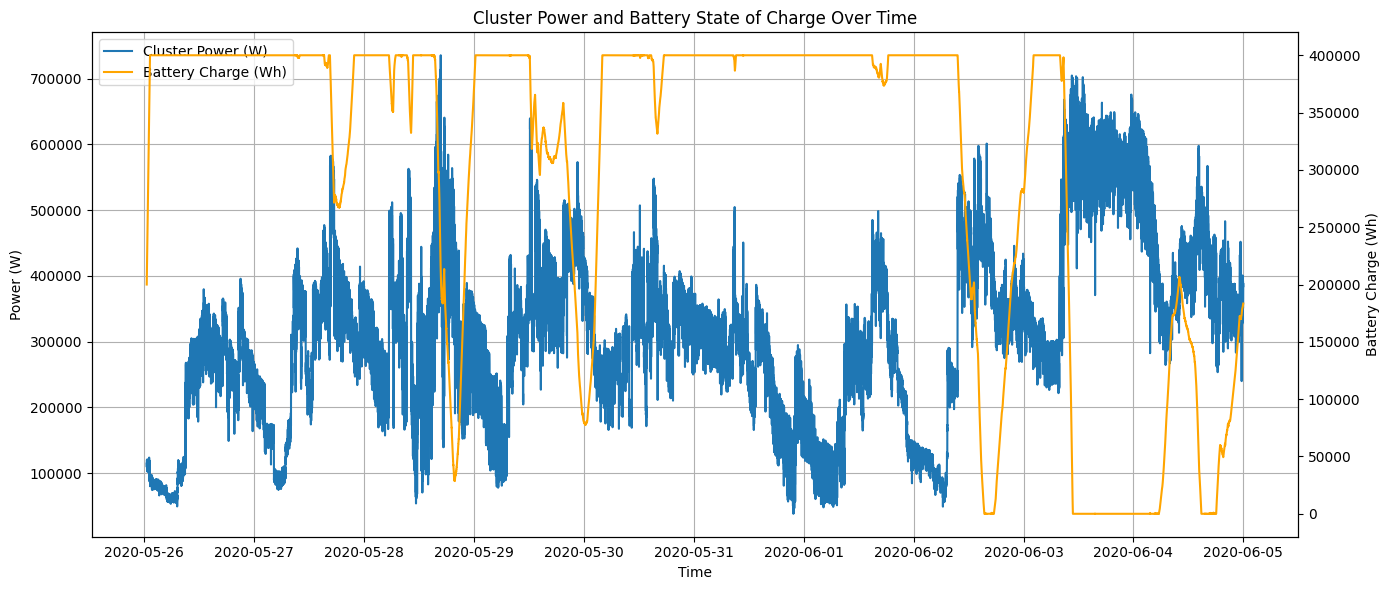

In [5]:
import matplotlib.pyplot as plt

# Assumo che tu abbia già:
# df["time"]
# df["power"]
# time_history
# battery_history

fig, ax1 = plt.subplots(figsize=(14, 6))

# ---- Grafico della potenza (asse sinistro) ----
ax1.plot(df["time"], df["power"], label="Cluster Power (W)")
ax1.set_xlabel("Time")
ax1.set_ylabel("Power (W)")
ax1.grid(True)

# ---- Asse destro per la carica della batteria ----
ax2 = ax1.twinx()
ax2.plot(time_history, battery_history, color="orange", label="Battery Charge (Wh)")
ax2.set_ylabel("Battery Charge (Wh)")

# ---- Titolo e legende ----
plt.title("Cluster Power and Battery State of Charge Over Time")

# Legende combinate
lns1, lbls1 = ax1.get_legend_handles_labels()
lns2, lbls2 = ax2.get_legend_handles_labels()
ax1.legend(lns1 + lns2, lbls1 + lbls2, loc="upper left")

plt.tight_layout()
plt.show()


⚠️ Gli anni {2020} non sono presenti nel CSV, mapping su anno 2021
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
123.48620511119324
132.40779152189546
126.86705681804631
133.42720258819173
138.44495430240605
127.02948843750916
140.60806335669648
130.3964646829955
138.7609931542042
125.96459930498972
131.77326889898725
132.61821737941716
133.3893831

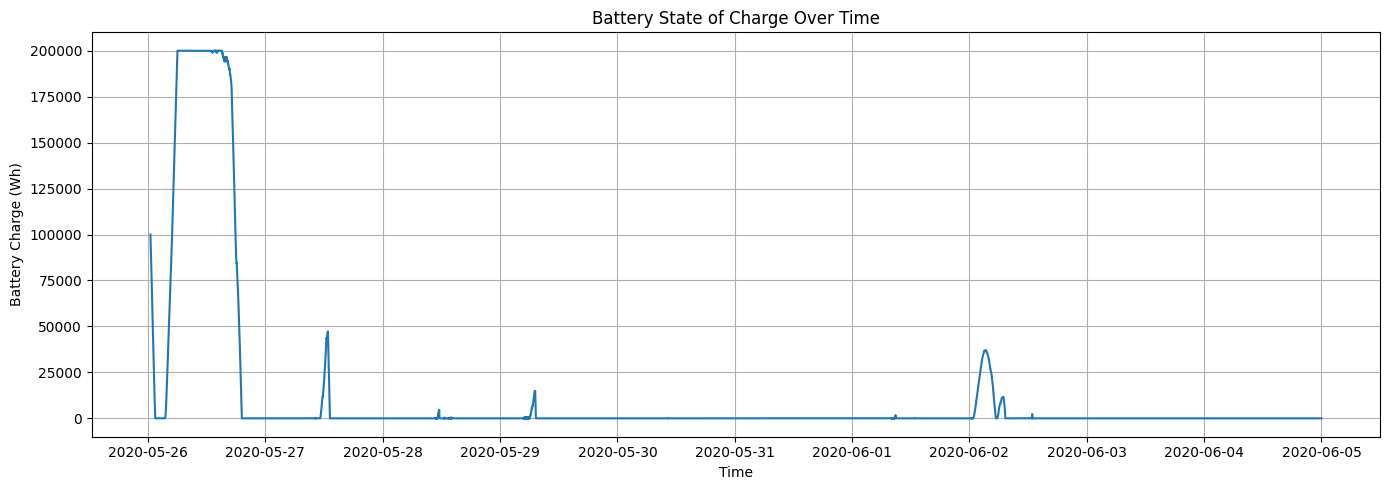

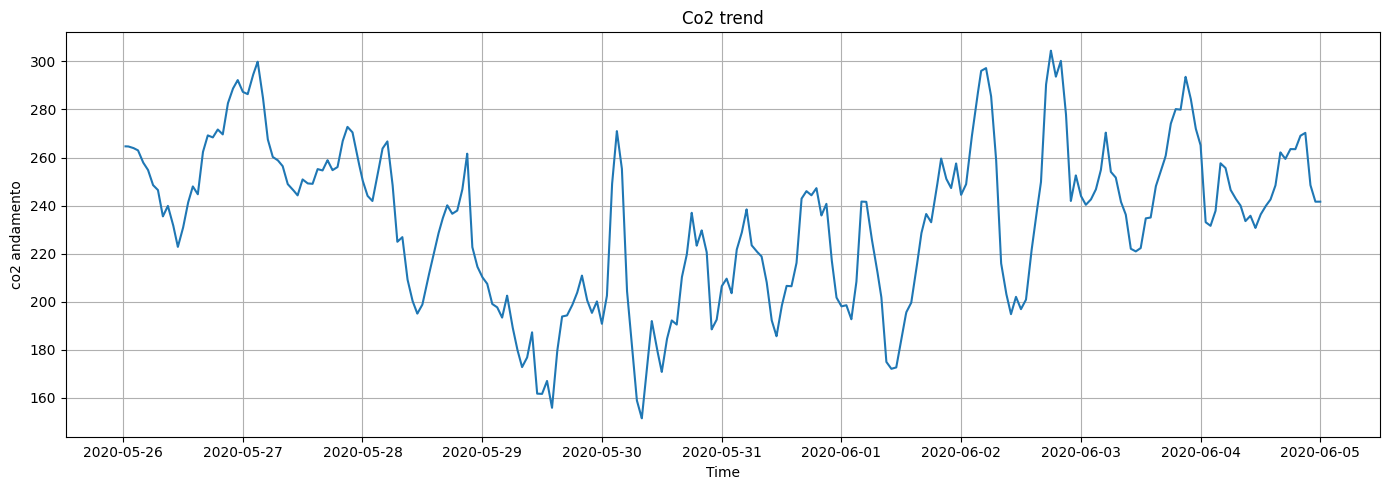

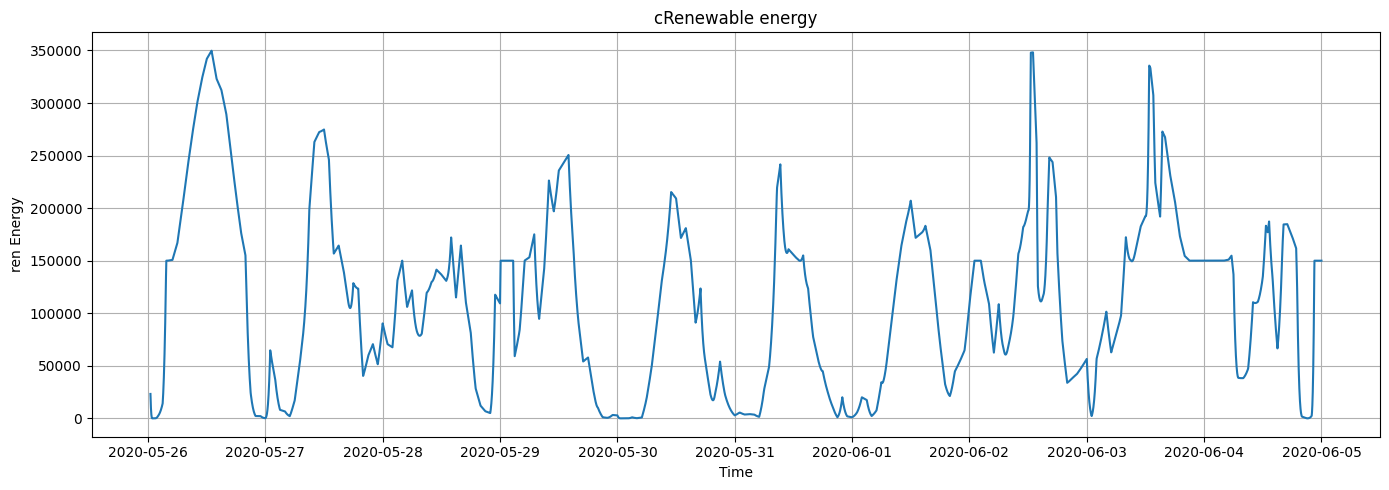

In [ ]:
# IN QUESTA SIMULAZIONE, LA BATTERIA DIVENTA UN ACCUMULATORE DI ENERGIA RINNOVABILE
# AD OGNI STEP, SI CERCA DI COPRIRE LA RICHISTA DEL CLUSTER CON LE RINNOVABILI
# SE AVANZA ENERGIA RINNOVABILE, SI CARICA LA BATTERIA
# SE NON BASTA, SI USA LA BATTTERIA
# SE NON BASTA NEANCHE LA BATTERIA, SI USA LA RETE ELETTRICA (APPLICANDO COSTI E THRESHOLD COME IN PRECEDENZA) 



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys
from renewable_real import RenewableModels
from co2 import CarbonIntensityModels

def dynamic_low_price(timestamp):
    hour = timestamp.hour
    if 0 <= hour < 6:
        return 0.0002
    elif 6 <= hour < 22:
        return 0.0012
    else:
        return 0.0005

# ---------------------------
# PARAMETRI
# ---------------------------

# fattore medio (gCO2 per kWh) — scegli il valore adatto (es. 270 gCO2/kWh per ITA come esempio)
CO2_G_PER_KWH_STATIC = 270.0

THRESHOLD = 400000          # W

BATTERY_CAPACITY = 200000          # Wh
BATTERY_INITIAL_CHARGE = BATTERY_CAPACITY / 2    # Wh

# LIMITI DI CARICA/SCARICA REALE
MAX_CHARGE_RATE = 200000            # 1-C
MAX_DISCHARGE_RATE = 200000         # 1-C

battery = BATTERY_INITIAL_CHARGE
total_cost = 0
total_co2_g = 0

battery_history = []
time_history = []
curtailment_history = []
cost_history = []
co2_history_g = []

df = pd.read_csv("cluster_power_only_nodes_10days.csv") #[8641:]
# df = pd.read_csv("cluster_power_only_nodes.csv")

df["time"] = pd.to_datetime(df["time"], utc=True)
df["dt_hours"] = df["time"].diff().dt.total_seconds() / 3600
df["dt_hours"] = df["dt_hours"].fillna(0)

# INSERISCO PREZZI
df["price_base"] = df["time"].apply(dynamic_low_price)

# INSERISCO VALORI RINNOVABILI
rm = RenewableModels()   # seed diverso per trainin
#df["P_solar"] = rm.solar_cloudy2(df)
#df["P_solar"] = rm.solar_simple(df)
#df["P_wind"] = rm.wind_stochastic(df)
#df["P_wind"] = rm.wind_uniform(df)
df["P_wind"] = rm.wind_from_openmeteo(df)
df["P_solar"] = rm.solar_from_openmeteo(df)
df["P_ren"]   = df["P_solar"] + df["P_wind"]

# INSERISCO VALORI C02
cm = CarbonIntensityModels(csv_file="Co2_IT-NO_2021-2024_hourly.csv")
df["co2_intensity"] = cm.co2_from_csv(df)


# df["energy_Wh"] = df["power"] * df["dt_hours"]

# ASSUNZIONE: MAX_CHARGE_RATE, MAX_DISCHARGE_RATE in W; BATTERY_* in Wh; dt in hours
# THRESHOLD in W si applica alla POTENZA presa dalla rete (P_grid)

for idx, row in df.iterrows():
    COST_LOW = row["price_base"]
    COST_HIGH = COST_LOW * 3
    
    CO2_G_PER_KWH = row["co2_intensity"]

    P_load = row["power"]        # W, carico del cluster
    P_ren  = row["P_ren"]        # W, rinnovabili disponibili
    dt = row["dt_hours"]         # ore
    t = row["time"]

    # 1) uso rinnovabili per coprire il carico (in potenza)
    P_from_ren = min(P_load, P_ren)          # W usati immediatamente
    P_excess_ren = max(P_ren - P_from_ren, 0) # W in eccesso che possono caricare la batteria

    # 1a) se c'è eccesso, carico la batteria (convertire in energia Wh)
    if P_excess_ren > 0:
        E_excess_available = P_excess_ren * dt                # Wh
        max_charge_wh = MAX_CHARGE_RATE * dt                 # Wh (MAX_CHARGE_RATE in W)
        charging_room = BATTERY_CAPACITY - battery           # Wh disponibile
        E_charge = min(E_excess_available, max_charge_wh, charging_room)

        battery += E_charge
        E_curtail = E_excess_available - E_charge
        curtailment_history.append(E_curtail)
        # non c'è costo perché rinnovabili + carica gratis
        total_cost += 0
        total_co2_g +=0

        # tutto il carico è stato coperto da rinnovabili (P_from_ren == P_load)
        # non serve altra azione in questo step
        # storico
        battery_history.append(battery)
        time_history.append(t)
        cost_history.append(0)
        co2_history_g.append(0)
        continue   # va al ciclo dopo, perchè tutto coperto

    # 2) se qui, P_ren <= P_load -> ci sono rinnovabili ma non sufficienti
    # restante potenza da coprire (W)
    P_remaining = P_load - P_from_ren   # W

    # converti a energia per confronto con batteria (Wh)
    E_needed = P_remaining * dt         # Wh

    # 2a) usa batteria quanto possibile (energeticamente)
    max_discharge_wh = MAX_DISCHARGE_RATE * dt   # Wh
    E_discharge = min(E_needed, battery, max_discharge_wh)

    # applica scarica
    battery -= E_discharge
    E_needed_after_batt = E_needed - E_discharge  # Wh rimasti da comprare dalla rete

    # calcolo import dalla rete in POTENZA per applicare THRESHOLD
    P_grid_import = E_needed_after_batt / dt if dt > 0 else 0  # W

    # separa base/peak sull'energia presa dalla rete
    # Applichiamo THRESHOLD alla potenza importata dalla rete (come richiesto)
    E_base = min(P_grid_import, THRESHOLD) * dt
    E_peak = max(P_grid_import - THRESHOLD, 0) * dt

    # costi
    cost = E_base * COST_LOW + E_peak * COST_HIGH
    total_cost += cost
    cost_history.append(cost)

    # co2
    co2_g = (E_base + E_peak) / 1000 * CO2_G_PER_KWH
    total_co2_g += co2_g
    co2_history_g.append(co2_g)


    # curtailment zero in questo ramo (nessun eccesso)
    curtailment_history.append(0)

    # storico
    battery_history.append(battery)
    time_history.append(t)



print(f"Costo totale con batteria: {total_cost:.2f} €")
print(f"CO2 totale (kg): {total_co2_g/1000:.3f}")
print(f"Carica finale batteria: {battery:.2f} Wh")

plt.figure(figsize=(14, 5))
plt.plot(time_history, battery_history)
plt.xlabel("Time")
plt.ylabel("Battery Charge (Wh)")
plt.title("Battery State of Charge Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(time_history, df["co2_intensity"])
plt.xlabel("Time")
plt.ylabel("co2 andamento")
plt.title("Co2 trend")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(time_history, df["P_ren"])
plt.xlabel("Time")
plt.ylabel("ren Energy")
plt.title("cRenewable energy")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# test saved model

obs, _ = env.reset()
done = False
total_cost_rl = 0

while not done:
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    total_cost_rl += -reward

print("Costo totale RL:", total_cost_rl)

Costo totale RL: 8947.275138879231
